In [679]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats, integrate
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None 


In [683]:

# read from csv file into dataframe and create duplicate dataframe
initial_mega_df = pd.read_csv('lotto.csv', index_col = False, )
mega_df = initial_mega_df[:]

In [684]:

# pull date into variable for formatting
date_ = mega_df.date

# format date column into date formal
date_col = list(map(lambda x: x.split(','), date_))
date_col1 = [str(x).split(',') for x in date_col]
date_list = list(map(lambda x: (x[1].strip(" ").strip("'").strip(" ") + x[2].strip(" ").strip("'").strip("']")), date_col1))
date_formatted = list(map(lambda x: datetime.datetime.strptime(x,"%B %d %Y").strftime('%m/%d/%Y'), date_list))

In [685]:

# add new date column to dataframe
date_formatted = pd.Series(date_formatted)
date_formatted = pd.to_datetime(date_formatted)
mega_df.insert(loc=0, column='date_prop', value = date_formatted)

# Add year, month and mean columns in mega_df
year = mega_df['date_prop'].dt.year
month = mega_df['date_prop'].dt.month

mega_df.insert(loc=1, column='year', value = year)
mega_df.insert(loc=2, column='month', value = month)

In [686]:

# pull jackpot into variable for formatting
jackpot_ = mega_df.jackpot
jackpot_col = list(map(lambda x: x.strip('$').strip('Million').strip(' '), jackpot_))

# add new jackpot column to dataframe
jackpot_formatted = pd.Series(jackpot_col)
jackpot_formatted = pd.to_numeric(jackpot_formatted)
mega_df.insert(loc=1, column='jackpot_prop', value = jackpot_formatted)

In [687]:

# Format winning_nums variable 
winning_nums_ = mega_df.winning_nums
winning_nums_col = list(map(lambda x: x.split(' · '), winning_nums_))
winning_nums_col_1 = [int(x[0]) for x in winning_nums_col]
winning_nums_col_2 = [int(x[1]) for x in winning_nums_col]
winning_nums_col_3 = [int(x[2]) for x in winning_nums_col]
winning_nums_col_4 = [int(x[3]) for x in winning_nums_col]
winning_nums_col_5 = [int(x[4]) for x in winning_nums_col]
winning_nums_list = [pd.to_numeric(x) for x in winning_nums_col]

# Add winning_nums as new columns in DataFrame
winning_nums_col_1_formatted = pd.Series(winning_nums_col_1)
winning_nums_col_2_formatted = pd.Series(winning_nums_col_2)
winning_nums_col_3_formatted = pd.Series(winning_nums_col_3)
winning_nums_col_4_formatted = pd.Series(winning_nums_col_4)
winning_nums_col_5_formatted = pd.Series(winning_nums_col_5)
winning_nums_list_formatted = pd.Series(winning_nums_list)
mega_df.insert(loc=2, column='num1_prop', value = winning_nums_col_1_formatted)
mega_df.insert(loc=3, column='num2_prop', value = winning_nums_col_2_formatted)
mega_df.insert(loc=4, column='num3_prop', value = winning_nums_col_3_formatted)
mega_df.insert(loc=5, column='num4_prop', value = winning_nums_col_4_formatted)
mega_df.insert(loc=6, column='num5_prop', value = winning_nums_col_5_formatted)
mega_df.insert(loc=7, column='num_list_prop', value = winning_nums_list_formatted)

In [688]:

# Sorting by date and assigning date as the DataFrame index
mega_df.sort_values(by='date_prop', inplace=True)
mega_df.set_index('date_prop')

,jackpot_prop,num1_prop,num2_prop,num3_prop,num4_prop,num5_prop,num_list_prop,year,month,date,jackpot,mega_ball,multiplier,winning_nums
date_prop,,,,,,,,,,,,,,
1996-09-06,5,5,11,29,47,50,"[5, 11, 29, 47, 50]",1996,9,"Friday, September 6, 1996",$5 Million,17,NaN,05 · 11 · 29 · 47 · 50
1996-09-13,5,3,4,9,30,47,"[3, 4, 9, 30, 47]",1996,9,"Friday, September 13, 1996",$5 Million,1,NaN,03 · 04 · 09 · 30 · 47
1996-09-20,10,5,24,31,34,48,"[5, 24, 31, 34, 48]",1996,9,"Friday, September 20, 1996",$10 Million,6,NaN,05 · 24 · 31 · 34 · 48
1996-09-27,15,8,25,35,37,48,"[8, 25, 35, 37, 48]",1996,9,"Friday, September 27, 1996",$15 Million,8,NaN,08 · 25 · 35 · 37 · 48
1996-10-04,20,8,16,18,36,38,"[8, 16, 18, 36, 38]",1996,10,"Friday, October 4, 1996",$20 Million,1,NaN,08 · 16 · 18 · 36 · 38
1996-10-11,26,2,23,37,40,50,"[2, 23, 37, 40, 50]",1996,10,"Friday, October 11, 1996",$26 Million,22,NaN,02 · 23 · 37 · 40 · 50
1996-10-18,31,9,18,24,26,46,"[9, 18, 24, 26, 46]",1996,10,"Friday, October 18, 1996",$31 Million,18,NaN,09 · 18 · 24 · 26 · 46
1996-10-25,36,23,28,30,35,43,"[23, 28, 30, 35, 43]",1996,10,"Friday, October 25, 1996",$36 Million,9,NaN,23 · 28 · 30 · 35 · 43
1996-11-01,5,2,10,28,39,49,"[2, 10, 28, 39, 49]",1996,11,"Friday, November 1, 1996",$5 Million,17,NaN,02 · 10 · 28 · 39 · 49


In [694]:

# break dataframe into 3 times periods based on lotto number changes - Total mega_df = 2188 rows
mega1_df = mega_df.loc[mega_df['date_prop'] < "10/19/2013"] #1713 drawings
mega2_df = mega_df.loc[(mega_df.date_prop >= "10/19/2013") & (mega_df.date_prop <= "10/27/2017")] #420 drawings
mega3_df = mega_df.loc[mega_df.date_prop > "10/27/2017"]  #55 drawings

In [695]:

# Add year, month and mean columns in mega1_df
#year = mega1_df['date_prop'].dt.year
#month = mega1_df['date_prop'].dt.month
mean1 = [np.mean(x) for x in mega1_df.num_list_prop]
exp_mean1 = np.ones(len(mega1_df.date_prop)) * (28.5)

mega1_df.insert(loc=7, column='num_mean', value = mean1)
mega1_df.insert(loc=8, column='exp_mean', value = exp_mean1)
#mega1_df.insert(loc=9, column='year', value = year)
#mega1_df.insert(loc=10, column='month', value = month)

In [696]:

# Add year, month and mean columns in mega2_df
#year = mega2_df['date_prop'].dt.year
#month = mega2_df['date_prop'].dt.month
mean2 = [np.mean(x) for x in mega2_df.num_list_prop]
exp_mean2 = np.ones(len(mega2_df.date_prop)) * (38)

mega2_df.insert(loc=7, column='num_mean', value = mean2)
mega2_df.insert(loc=8, column='exp_mean', value = exp_mean2)
#mega2_df.insert(loc=9, column='year', value = year)
#mega2_df.insert(loc=10, column='month', value = month)

In [697]:

# Add year, month and mean columns in mega3_df
#year = mega3_df['date_prop'].dt.year
#month = mega3_df['date_prop'].dt.month
mean3 = [np.mean(x) for x in mega3_df.num_list_prop]
exp_mean3 = np.ones(len(mega3_df.date_prop)) * (35.5)

mega3_df.insert(loc=7, column='num_mean', value = mean3)
mega3_df.insert(loc=8, column='exp_mean', value = exp_mean3)
#mega3_df.insert(loc=9, column='year', value = year)
#mega3_df.insert(loc=10, column='month', value = month)

In [698]:
pd.options.mode.chained_assignment = None 

# Add Above or Below mean column to the DataFrames

mega1_df.loc[mega1_df['num_mean'] > mega1_df['exp_mean'], 'mean_status'] = 'Above'
mega1_df.loc[mega1_df['num_mean'] == mega1_df['exp_mean'], 'mean_status'] = 'Same'
mega1_df.loc[mega1_df['num_mean'] < mega1_df['exp_mean'], 'mean_status'] = 'Below'


mega2_df.loc[mega2_df['num_mean'] > mega2_df['exp_mean'], 'mean_status'] = 'Above'
mega2_df.loc[mega2_df['num_mean'] == mega2_df['exp_mean'], 'mean_status'] = 'Same'
mega2_df.loc[mega2_df['num_mean'] < mega2_df['exp_mean'], 'mean_status'] = 'Below'


mega3_df.loc[mega3_df['num_mean'] > mega3_df['exp_mean'], 'mean_status'] = 'Above'
mega3_df.loc[mega3_df['num_mean'] == mega3_df['exp_mean'], 'mean_status'] = 'Same'
mega3_df.loc[mega3_df['num_mean'] < mega3_df['exp_mean'], 'mean_status'] = 'Below'


In [699]:

pd.options.mode.chained_assignment = None 

# Add Rolling Average to DataFrames

mega1_df['num_mean_MA10'] = mega1_df.num_mean.rolling(window=10).mean()
mega1_df['num_mean_MA25'] = mega1_df.num_mean.rolling(window=25).mean()
mega1_df['num_mean_MA50'] = mega1_df.num_mean.rolling(window=50).mean()
mega1_df['num_mean_MA100'] = mega1_df.num_mean.rolling(window=100).mean()


mega2_df['num_mean_MA10'] = mega2_df.num_mean.rolling(window=10).mean()
mega2_df['num_mean_MA25'] = mega2_df.num_mean.rolling(window=25).mean()
mega2_df['num_mean_MA50'] = mega2_df.num_mean.rolling(window=50).mean()
mega2_df['num_mean_MA100'] = mega2_df.num_mean.rolling(window=100).mean()

mega3_df['num_mean_MA10'] = mega3_df.num_mean.rolling(window=10).mean()
mega3_df['num_mean_MA25'] = mega3_df.num_mean.rolling(window=25).mean()
mega3_df['num_mean_MA50'] = mega3_df.num_mean.rolling(window=50).mean()
mega3_df['num_mean_MA100'] = mega3_df.num_mean.rolling(window=100).mean()

In [700]:
mega1_df.to_csv("mega_time1", columns=None, header=True, index=False, index_label=None)
mega2_df.to_csv("mega_time2", columns=None, header=True, index=False, index_label=None)
mega3_df.to_csv("mega_time3", columns=None, header=True, index=False, index_label=None)

In [701]:
%matplotlib inline

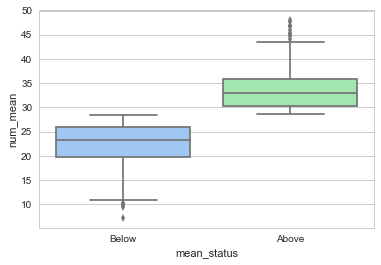

In [702]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.boxplot(x='mean_status', y='num_mean', data=mega1_df, orient='v')


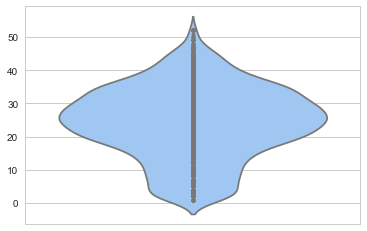

In [703]:


sns.violinplot([mega1_df.mega_ball, mega1_df.num_mean], inner="point", orient='v')

sns.set(rc={'figure.figsize':(15,12)})

Text(0.5,1,'Mean Value of Winning Numbers over Time')

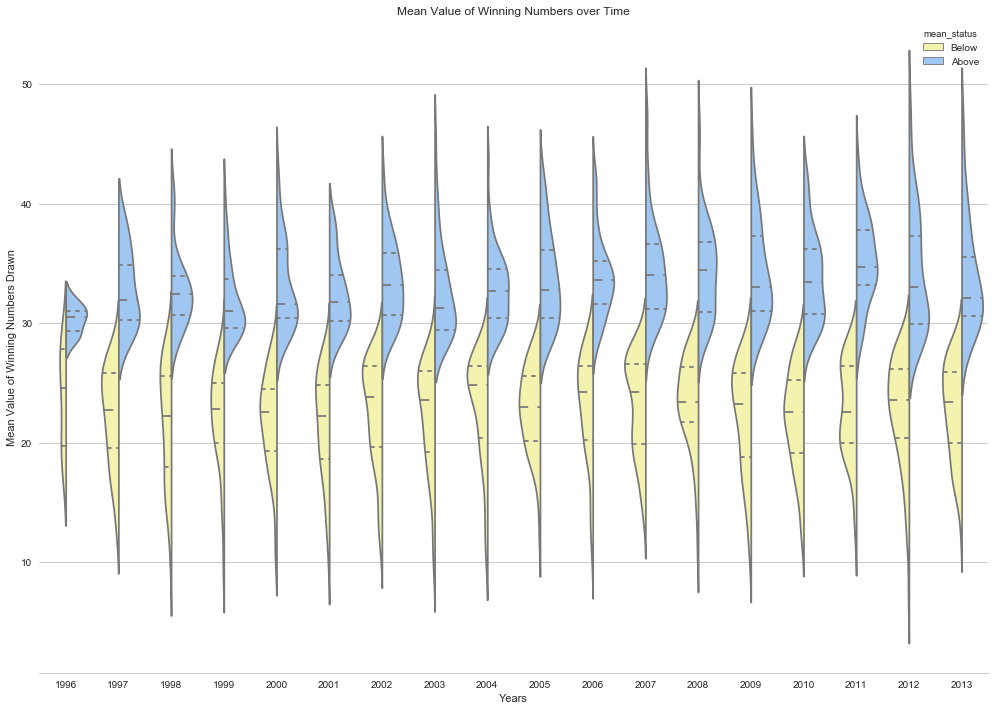

In [704]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
#mega1 = sns.load_dataset("mega1_df")

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots()
sns.violinplot(x="year", y="num_mean", hue="mean_status", data=mega1_df, split=True,
               inner="quart", palette={"Above": "b", "Below": "y"}, ax=ax)
sns.despine(left=True)
fig.set_size_inches(17, 12)
plt.xlabel("Years")
plt.ylabel("Mean Value of Winning Numbers Drawn")
plt.title("Mean Value of Winning Numbers over Time")

In [717]:
initial_mega_detail_df = pd.read_csv('mega_detail.csv', index_col = False, )
mega_detail_df = initial_mega_detail_df[:]

In [718]:

# Format colums of mega_detail_df DataFrame
clist = list(mega_detail_df.columns)
col_list = clist[0:18]
col_list.extend(clist[27:29])
col_list.extend(clist[32:50])

In [719]:

# Removing "$" and "," from number fields
mega_detail_df[col_list] = mega_detail_df[col_list].replace({'\$':''}, regex = True)
mega_detail_df[col_list] = mega_detail_df[col_list].replace({',':''}, regex = True)
mega_detail_df[col_list] = mega_detail_df[col_list].apply(pd.to_numeric)

In [720]:

# pull date into variable for formatting
date_d = mega_detail_df.detail_date

# format date column into date formal
dcol_d = list(map(lambda x: x.split(','), date_d))
date_col_d = [str(x).split(',') for x in dcol_d]
date_list_d = list(map(lambda x: (x[1].strip(" ").strip("'").strip(" ") + x[2].strip(" ").strip("'").strip("']")), date_col_d))
date_formatted_d = list(map(lambda x: datetime.datetime.strptime(x,"%B %d %Y").strftime('%m/%d/%Y'), date_list_d))

In [721]:

# add new date column to dataframe
date_formatted_d = pd.Series(date_formatted_d)
date_formatted_d = pd.to_datetime(date_formatted_d)
mega_detail_df.insert(loc=0, column='date_prop', value = date_formatted_d)

In [722]:
# Add year and month columns in mega_detail_df
year_d = mega_detail_df['date_prop'].dt.year
month_d = mega_detail_df['date_prop'].dt.month

mega_detail_df.insert(loc=1, column='year', value = year_d)
mega_detail_df.insert(loc=2, column='month', value = month_d)

In [723]:

# Sorting by date and assigning date as the DataFrame index
mega_detail_df.sort_values(by='date_prop', inplace=True)
mega_detail_df.set_index('date_prop', inplace=True)

# Drop NaN values and replace with empty string
mega_detail_df = mega_detail_df.fillna('')

In [733]:
mega_detail_df

,year,month,ca_amt1,ca_amt2,ca_amt3,ca_amt4,ca_amt5,ca_amt6,ca_amt7,ca_amt8,...,state_num8,state_num_tot,state_type1,state_type2,state_type3,state_type4,state_type5,state_type6,state_type7,state_type8
date_prop,,,,,,,,,,,,,,,,,,,,,
1996-09-06,1996,9,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-09-13,1996,9,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-09-20,1996,9,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-09-27,1996,9,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-10-04,1996,10,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-10-11,1996,10,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-10-18,1996,10,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-10-25,1996,10,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1
1996-11-01,1996,11,,,,,,,,,...,0,0,5 + 0,4 + 1,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1


In [732]:

# Format the Jackpot and Second prize winner columns
mega_detail_df[['j_winner','s_winner']] = mega_detail_df[['j_winner','s_winner']].replace({'from':''}, regex = True)


In [726]:
#mega_detail_df[['j_winner','s_winner','j_num','j_type','j_amt']]

In [736]:

# split jackpot winner
jwinner_ = mega_detail_df.j_winner
jwinner_col = list(map(lambda x: str(x).split(','), jwinner_))


# add new jackpot column to dataframe
#jackpot_formatted = pd.Series(jwinner_col)
#mega_detail_df.insert(loc=5, column='j_winner_prop', value = jackpot_formatted)

# split second jackpot winner
swinner_ = mega_detail_df.s_winner
swinner_col = list(map(lambda x: str(x).split(','), swinner_))

# add new jackpot column to dataframe
#sjackpot_formatted = pd.Series(swinner_col)
#mega_detail_df.insert(loc=5, column='s_winner_prop', value = sjackpot_formatted)

date_col = mega_detail_df.index
j_amt_col = mega_detail_df.j_amt
j_num_col = mega_detail_df.j_num

In [737]:
# winner_df = pd.DataFrame({'jackpot_winner': jwinner_col, 'second winner': swinner_col, 'date':date_col, 'j_amt_col': j_amt_col, 'j_num_col': j_num_col})
# winner_df.to_csv('winner_info1.csv', index=False)

In [738]:

# Create Jackpot winner DataFrame and Remove NAs
initial_winner_detail_df = pd.read_csv('winner_info_prop.csv', index_col = False, )
winner_detail_df= initial_winner_detail_df[:]
winner_detail_df = winner_detail_df.fillna('')

In [739]:

# Change Date to date dtype
winner_detail_df[['date']] = winner_detail_df[['date']].apply(pd.to_datetime)

# Add year and month columns in winner_detail_df
year_j = winner_detail_df['date'].dt.year
month_j = winner_detail_df['date'].dt.month

winner_detail_df.insert(loc=1, column='year', value = year_j)
winner_detail_df.insert(loc=2, column='month', value = month_j)

In [740]:

# Change colums to numeric type 
winner_detail_df[['jnum_1','jnum_2','jnum_3','jnum_4']] = winner_detail_df[['jnum_1','jnum_2','jnum_3','jnum_4']].apply(pd.to_numeric)


In [741]:


# Sorting by date and assigning date as the DataFrame index
winner_detail_df.sort_values(by='date', inplace=True)
winner_detail_df.set_index('date', inplace=True)


In [742]:
winner_detail_df.dtypes

year                int64
month               int64
jackpot_winner     object
jnum_1            float64
jwinner_1          object
jnum_2            float64
jwinner_2          object
jnum_3            float64
jwinner_3          object
jnum_4            float64
jwinner_4          object
j_amt_col           int64
j_num_col           int64
dtype: object

In [743]:

# Calculate proportion of Jackpot amounts won by Month
jackpot_amt_month = winner_detail_df.groupby(['month'])['j_amt_col'].agg('sum')
total_jackpot_won = sum(jackpot_amt_month)
jackpot_month_prop = jackpot_amt_month/total_jackpot_won

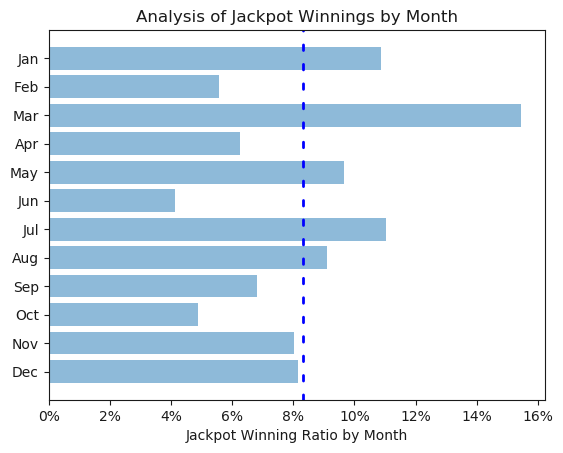

In [744]:

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Plot Jackpot Winning ratio by Month
order = jackpot_month_prop.index
fig, ax = plt.subplots()

plt.barh(order, jackpot_month_prop*100, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Ratio by Month')
plt.title('Analysis of Jackpot Winnings by Month')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_month_prop*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()


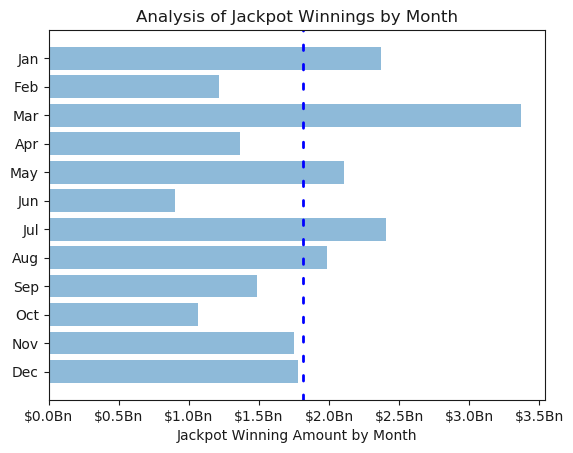

In [745]:


# Plot Jackpot Winnings by Month
order = jackpot_amt_month.index
fig, ax = plt.subplots()
jackpot_amt_month_mean = np.mean(jackpot_amt_month)

plt.barh(order, jackpot_amt_month, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Amount by Month')
plt.title('Analysis of Jackpot Winnings by Month')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_month_mean, color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [746]:


# Calculate Number of Jackpot wins by Month
jackpot_num_month = winner_detail_df.groupby(['month'])['j_num_col'].agg('sum')


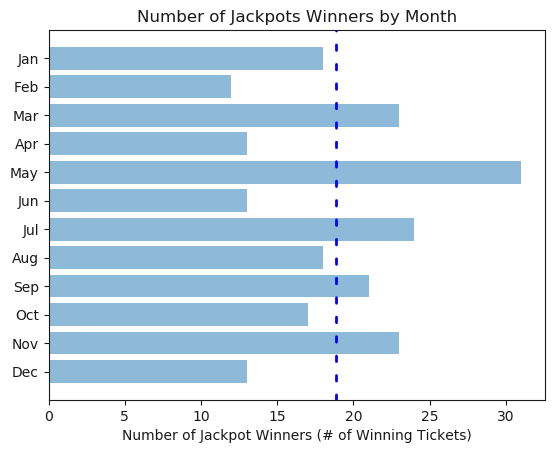

In [750]:


# Plot Number of Jackpot Winners by Month
order = jackpot_num_month.index
fig, ax = plt.subplots()

plt.barh(order, jackpot_num_month, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Number of Jackpot Winners (# of Winning Tickets)')
plt.title('Number of Jackpots Winners by Month')

plt.gca().invert_yaxis()
ax.axvline(jackpot_num_month.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [751]:

# Calculate Count of Jackpot wins by Month
jackpot_count_month = winner_detail_df.groupby(['month'])['jnum_1'].agg('sum')

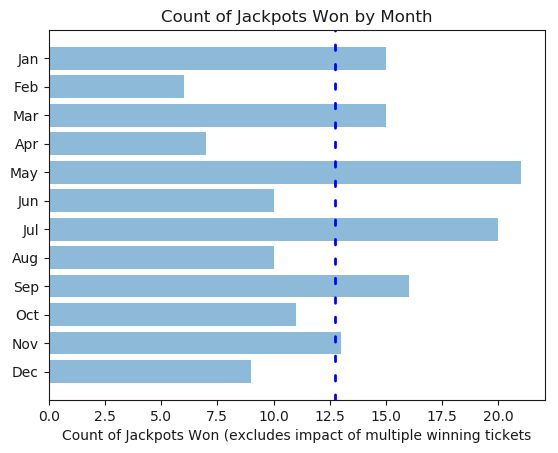

In [755]:


# Plot Count of Jackpot won by Month
order = jackpot_count_month.index
fig, ax = plt.subplots()

plt.barh(order, jackpot_count_month, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Count of Jackpots Won (excludes impact of multiple winning tickets')
plt.title('Count of Jackpots Won by Month')
plt.gca().invert_yaxis()
ax.axvline(jackpot_count_month.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [756]:

# Calculate proportion of Jackpot amounts won by Year
jackpot_amt_year = winner_detail_df.groupby(['year'])['j_amt_col'].agg('sum')
total_jackpot_won_year = sum(jackpot_amt_year)
jackpot_year_prop = jackpot_amt_year/total_jackpot_won_year

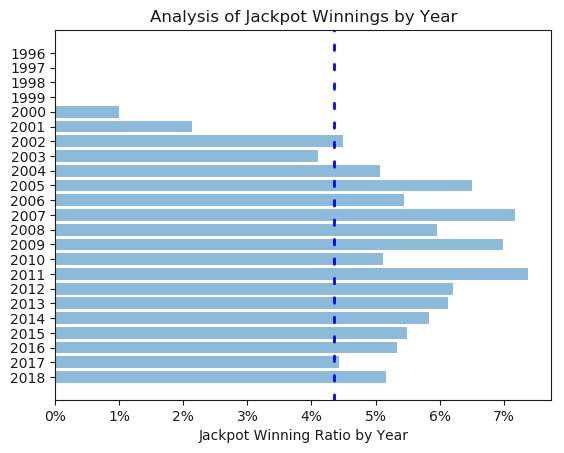

In [757]:

# Plot Jackpot Winning ratio by Year
order = jackpot_year_prop.index
fig, ax = plt.subplots()
years = list(range(1996,2019))

plt.barh(order, jackpot_year_prop*100, align='center', alpha=0.5)
plt.yticks(order, years)
plt.xlabel('Jackpot Winning Ratio by Year')
plt.title('Analysis of Jackpot Winnings by Year')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_year_prop*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

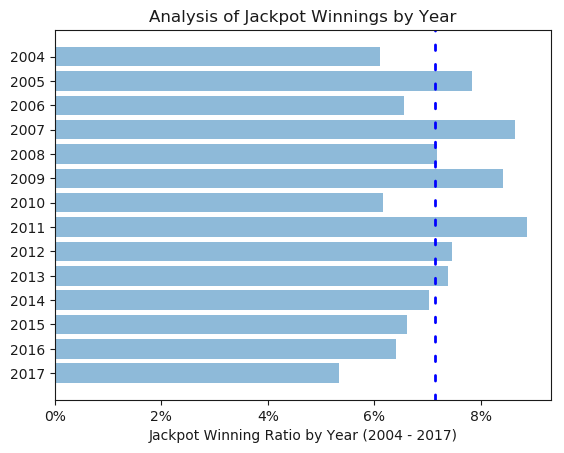

In [773]:

# Plot Jackpot Winning ratio by Year from 2004 to 2017
jackpot_amt_year_since_2004 = jackpot_amt_year[(jackpot_amt_year.index>2003)&(jackpot_amt_year.index<2018)]
total_jackpot_amt_year_since_2004 = sum(jackpot_amt_year_since_2004)
jackpot_year_prop_2004 = jackpot_amt_year_since_2004/total_jackpot_amt_year_since_2004
order = jackpot_year_prop_2004.index
fig, ax = plt.subplots()
years = list(range(2004,2018))

plt.barh(order, jackpot_year_prop_2004*100, align='center', alpha=0.5)
plt.yticks(order, years)
plt.xlabel('Jackpot Winning Ratio by Year (2004 - 2017)')
plt.title('Analysis of Jackpot Winnings by Year')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_year_prop_2004*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

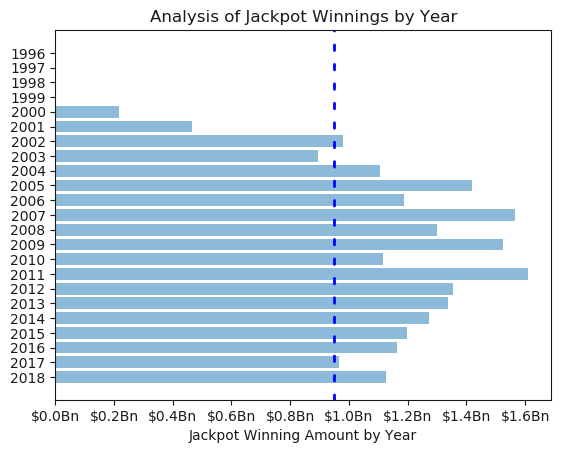

In [774]:


# Plot Jackpot Winnings by Year
order = jackpot_amt_year.index
fig, ax = plt.subplots()
years = list(range(1996,2019))

plt.barh(order, jackpot_amt_year, align='center', alpha=0.5)
plt.yticks(order, years)
plt.xlabel('Jackpot Winning Amount by Year')
plt.title('Analysis of Jackpot Winnings by Year')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_year.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

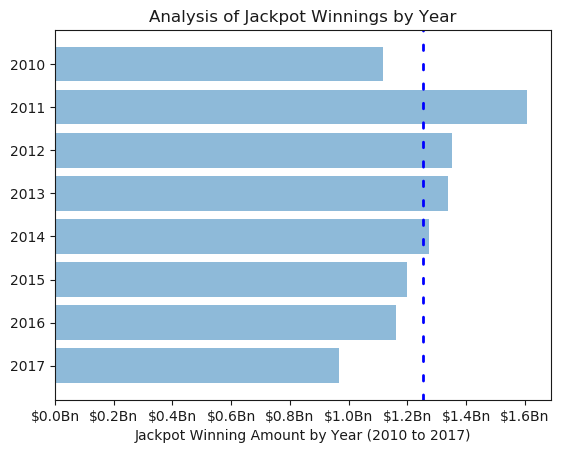

In [779]:

# Filter data
jackpot_amt_year_since_2010 = jackpot_amt_year[(jackpot_amt_year.index>2009)&(jackpot_amt_year.index<2018)]

# Plot Jackpot Winnings by Year from 2010 to present
order_2010 = jackpot_amt_year_since_2010.index
fig, ax = plt.subplots()
years_2010 = list(range(2010,2018))

plt.barh(order_2010, jackpot_amt_year_since_2010, align='center', alpha=0.5, )
plt.yticks(order_2010, years_2010)
plt.xlabel('Jackpot Winning Amount by Year (2010 to 2017)')
plt.title('Analysis of Jackpot Winnings by Year')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_year_since_2010.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

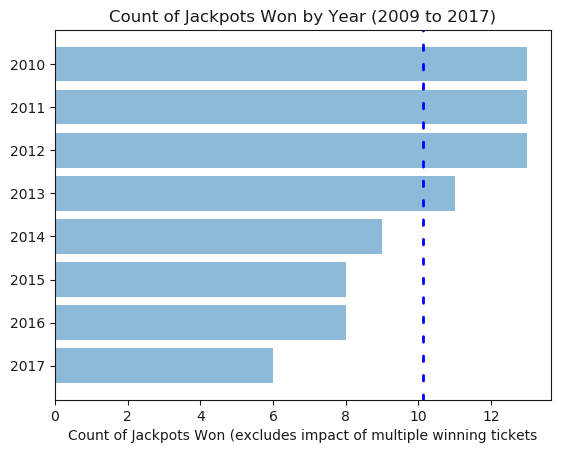

In [790]:

# Calculate Count of Jackpot wins by Month
jackpot_count_year = winner_detail_df.groupby(['year'])['jnum_1'].agg('sum')

# Filter data
jackpot_count_year_since_2010 = jackpot_count_year[(jackpot_count_year.index>2009)&(jackpot_count_year.index<2018)]


# Plot Count of Jackpot won by Year
order_2010 = jackpot_count_year_since_2010.index
fig, ax = plt.subplots()
years_2010 = list(range(2010,2018))

plt.barh(order_2010, jackpot_count_year_since_2010, align='center', alpha=0.5)
plt.yticks(order_2010, years_2010)
plt.xlabel('Count of Jackpots Won (excludes impact of multiple winning tickets')
plt.title('Count of Jackpots Won by Year (2009 to 2017)')
plt.gca().invert_yaxis()
ax.axvline(jackpot_count_year_since_2010.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [638]:
#winner_detail_df

In [678]:
mega_df.dtypes

date_prop        datetime64[ns]
jackpot_prop              int64
num1_prop                 int64
num2_prop                 int64
num3_prop                 int64
num4_prop                 int64
num5_prop                 int64
num_list_prop            object
date                     object
jackpot                  object
mega_ball                 int64
multiplier              float64
winning_nums             object
dtype: object

In [796]:
import plotly.plotly as py
from plotly.graph_objs import *

py.tools.set_credentials_file(username='sanjaypamnani',api_key='••••••••••')

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.plot(data, filename = 'basic-line')

AttributeError: module 'plotly.plotly' has no attribute 'tools'

In [793]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd


py.tools.set_credentials_file(username='sanjaypamnani',api_key='••••••••••')

fig = ff.create_facet_grid(
    mega_df,
    x='date_prop',
    y='jackpot_prop',
    facet_row='year',
   
)

py.iplot(fig, filename='facet by row and col')

AttributeError: module 'plotly.plotly' has no attribute 'tools'

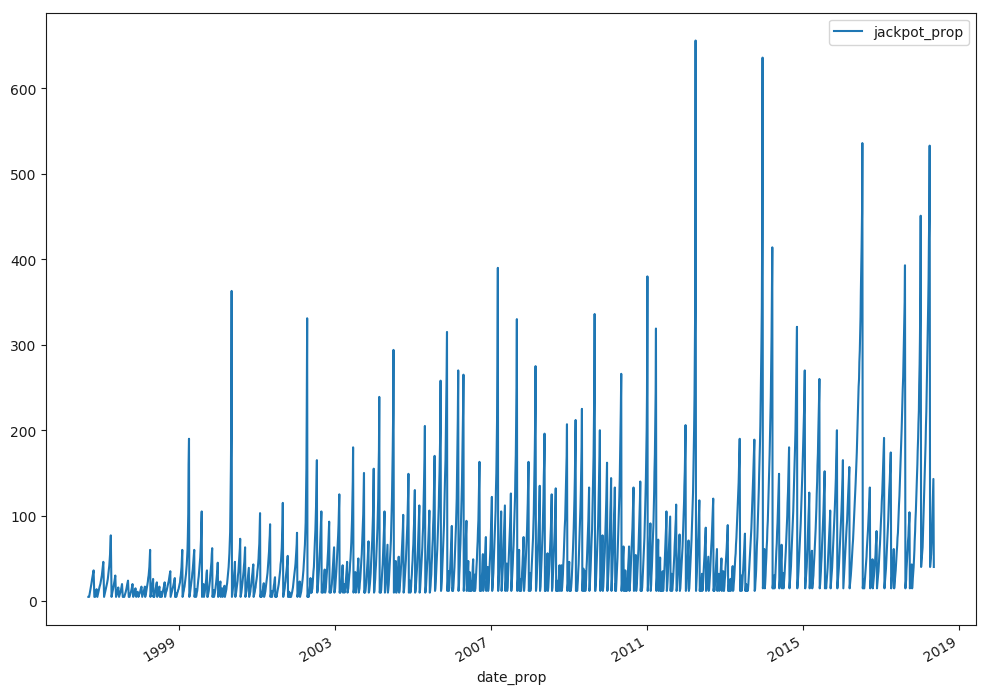

In [555]:
mega_df.plot.line(x='date_prop',y='jackpot_prop',figsize=(12,9))

In [639]:
jackpot_amt_month

month
1     2373000000
2     1217000000
3     3369000000
4     1367000000
5     2110000000
6      904000000
7     2404000000
8     1988000000
9     1483000000
10    1063000000
11    1750000000
12    1779000000
Name: j_amt_col, dtype: int64

In [652]:
jackpot_amt_month_since_2010 = winner_detail_df[winner_detail_df['year']>2009].groupby(['month'])['j_amt_col'].agg('sum')

11144000000

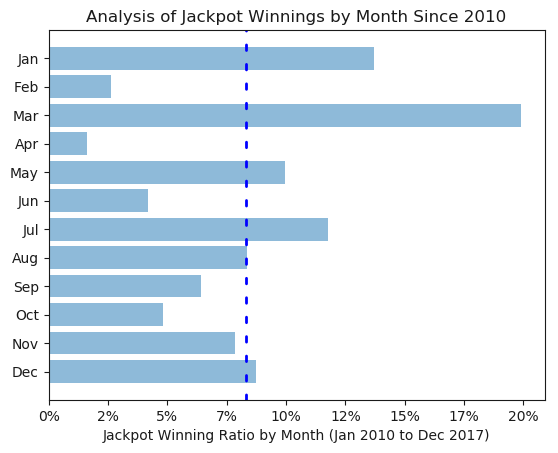

In [664]:


# Calculate proportion of Jackpot amounts won by Month since 2010
jackpot_amt_month_since_2010 = winner_detail_df[(winner_detail_df['year']>2009)&(winner_detail_df['year']<2018)].groupby(['month'])['j_amt_col'].agg('sum')
total_jackpot_won_since_2010 = sum(jackpot_amt_month_since_2010)
jackpot_month_prop_since_2010 = jackpot_amt_month_since_2010/total_jackpot_won_since_2010


# Plot Jackpot Winning ratio by Month Since 2010
order_since_2010 = jackpot_month_prop_since_2010.index
fig, ax = plt.subplots()

plt.barh(order_since_2010, jackpot_month_prop_since_2010*100, align='center', alpha=0.5)
plt.yticks(order_since_2010, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Ratio by Month (Jan 2010 to Dec 2017)')
plt.title('Analysis of Jackpot Winnings by Month Since 2010')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_month_prop_since_2010*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

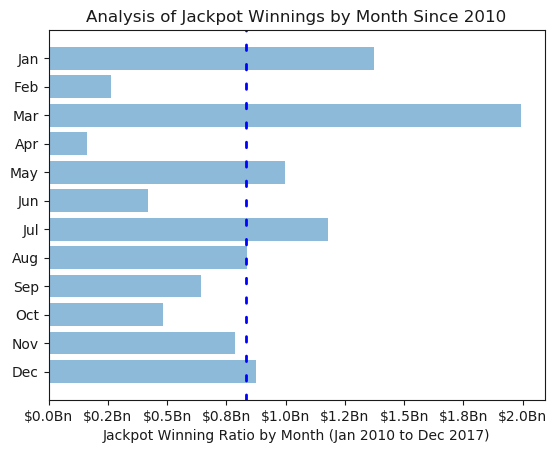

In [674]:


# Calculate proportion of Jackpot amounts won by Month since 2010
jackpot_amt_month_since_2010 = winner_detail_df[(winner_detail_df['year']>2009)&(winner_detail_df['year']<2018)].groupby(['month'])['j_amt_col'].agg('sum')


# Plot Jackpot Winning ratio by Month Since 2010
order_since_2010 = jackpot_amt_month_since_2010.index
fig, ax = plt.subplots()

plt.barh(order_since_2010, jackpot_amt_month_since_2010, align='center', alpha=0.5)
plt.yticks(order_since_2010, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Ratio by Month (Jan 2010 to Dec 2017)')
plt.title('Analysis of Jackpot Winnings by Month Since 2010')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)

ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_month_since_2010.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

(array([ 135.,   83.,   56.,   34.,   23.,   21.,   13.,    9.,    8.,
           6.,    4.,    4.,    3.,    0.,    0.,    2.,    0.,    0.,
           0.,    2.]),
 array([ 101.  ,  128.75,  156.5 ,  184.25,  212.  ,  239.75,  267.5 ,
         295.25,  323.  ,  350.75,  378.5 ,  406.25,  434.  ,  461.75,
         489.5 ,  517.25,  545.  ,  572.75,  600.5 ,  628.25,  656.  ]),
 <a list of 20 Patch objects>)

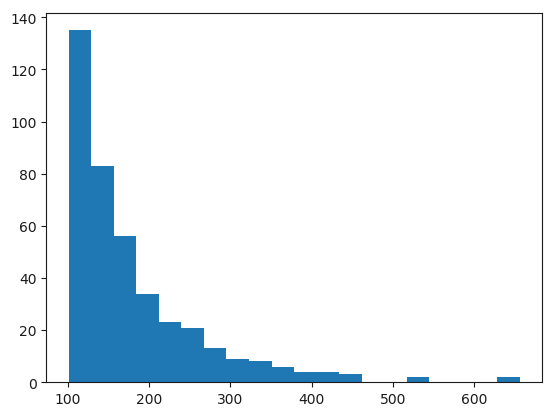

In [582]:

# histogram of lotto greater than $100 million
jack_above_100m = mega_df.jackpot_prop[mega_df.jackpot_prop>100]
date_jack_above_100m = mega_df.date_prop[mega_df.jackpot_prop>100]


plt.hist(jack_above_100m, bins=20, histtype='bar', align='mid', orientation='vertical', color=None, label=None, stacked=False, data=mega_df)





In [572]:
date_jack_above_50m.dtype

dtype('<M8[ns]')

In [320]:
#import re
#def clean_winner(x):
#    lst = []
#    m = re.search('([1-9]) (.*)', str(x))
#    return m

#x = list(map(lambda x: clean_winner(x), jwinner_col))
#y = [a.groups() for a in x if a]

In [327]:
#postal = {'WA': 'WASHINGTON', 'VA': 'VIRGINIA', 'DE': 'DELAWARE', 'DC': 'DISTRICT OF COLUMBIA', 'WI': 'WISCONSIN', 'WV': 'WEST VIRGINIA', 'HI': 'HAWAII', 'FL': 'FLORIDA', 'FM': 'FEDERATED STATES OF MICRONESIA', 'WY': 'WYOMING', 'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 'TX': 'TEXAS', 'LA': 'LOUISIANA', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'NE': 'NEBRASKA', 'TN': 'TENNESSEE', 'NY': 'NEW YORK', 'PA': 'PENNSYLVANIA', 'CA': 'CALIFORNIA', 'NV': 'NEVADA', 'PW': 'PALAU', 'GU': 'GUAM GU', 'CO': 'COLORADO', 'VI': 'VIRGIN ISLANDS', 'AK': 'ALASKA', 'AL': 'ALABAMA', 'AS': 'AMERICAN SAMOA', 'AR': 'ARKANSAS', 'VT': 'VERMONT', 'IL': 'ILLINOIS', 'GA': 'GEORGIA', 'IN': 'INDIANA', 'IA': 'IOWA', 'OK': 'OKLAHOMA', 'AZ': 'ARIZONA', 'ID': 'IDAHO', 'CT': 'CONNECTICUT', 'ME': 'MAINE', 'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 'OH': 'OHIO', 'UT': 'UTAH', 'MO': 'MISSOURI', 'MN': 'MINNESOTA', 'MI': 'MICHIGAN', 'MH': 'MARSHALL ISLANDS', 'RI': 'RHODE ISLAND', 'KS': 'KANSAS', 'MT': 'MONTANA', 'MP': 'NORTHERN MARIANA ISLANDS', 'MS': 'MISSISSIPPI', 'PR': 'PUERTO RICO', 'SC': 'SOUTH CAROLINA', 'KY': 'KENTUCKY', 'OR': 'OREGON', 'SD': 'SOUTH DAKOTA'}
#postal_title = {k:v.title() for k, v in postal.items()}

In [211]:
#mega_detail_df[['j_winner_prop','j_winner','s_winner_prop','s_winner']]